## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn import tree

## Working on Data
1. Read Data
2. Clean Data
3. Visualize Data
4. Split Data

#### Read Data
- Read data from csv file
- Read first 10 rows from file
- print data set's informaion

In [2]:
df=pd.read_csv("Heart_Disease_Prediction.csv")
display(df.head(10))
print(30*"-","COLUMNS",30*"-")
print(df.columns,"\n",30*"-","INFO",30*"-")
display(df.info())

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,Absence
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,Presence
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,Presence
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,Presence
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,Presence


------------------------------ COLUMNS ------------------------------
Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object') 
 ------------------------------ INFO ------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR             

None

#### Clean Data
- check null data 
- check duplication

In [3]:
print(f"number of null values : {df.isnull().sum().sum()}")
print(f"number of dublicate values is : {df.duplicated().sum()}")

number of null values : 0
number of dublicate values is : 0


**Theare is no duplicate data or null data so untill now data is clean**

#### Visualize Data
- Visualize the distribution of the data using seaborn pairplot
- Visualize the correlation of the data using seaborn heatmap
- Remove columns with low correlation with target column

 **Encode the target column to visualize it**

In [4]:
encode=LabelEncoder()
df["Heart Disease"]=encode.fit_transform(df["Heart Disease"])

In [6]:
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


p:\PYTHON\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
p:\PYTHON\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
p:\PYTHON\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
p:\PYTHON\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
p:\PYTHON\Lib\site-packages\seaborn\

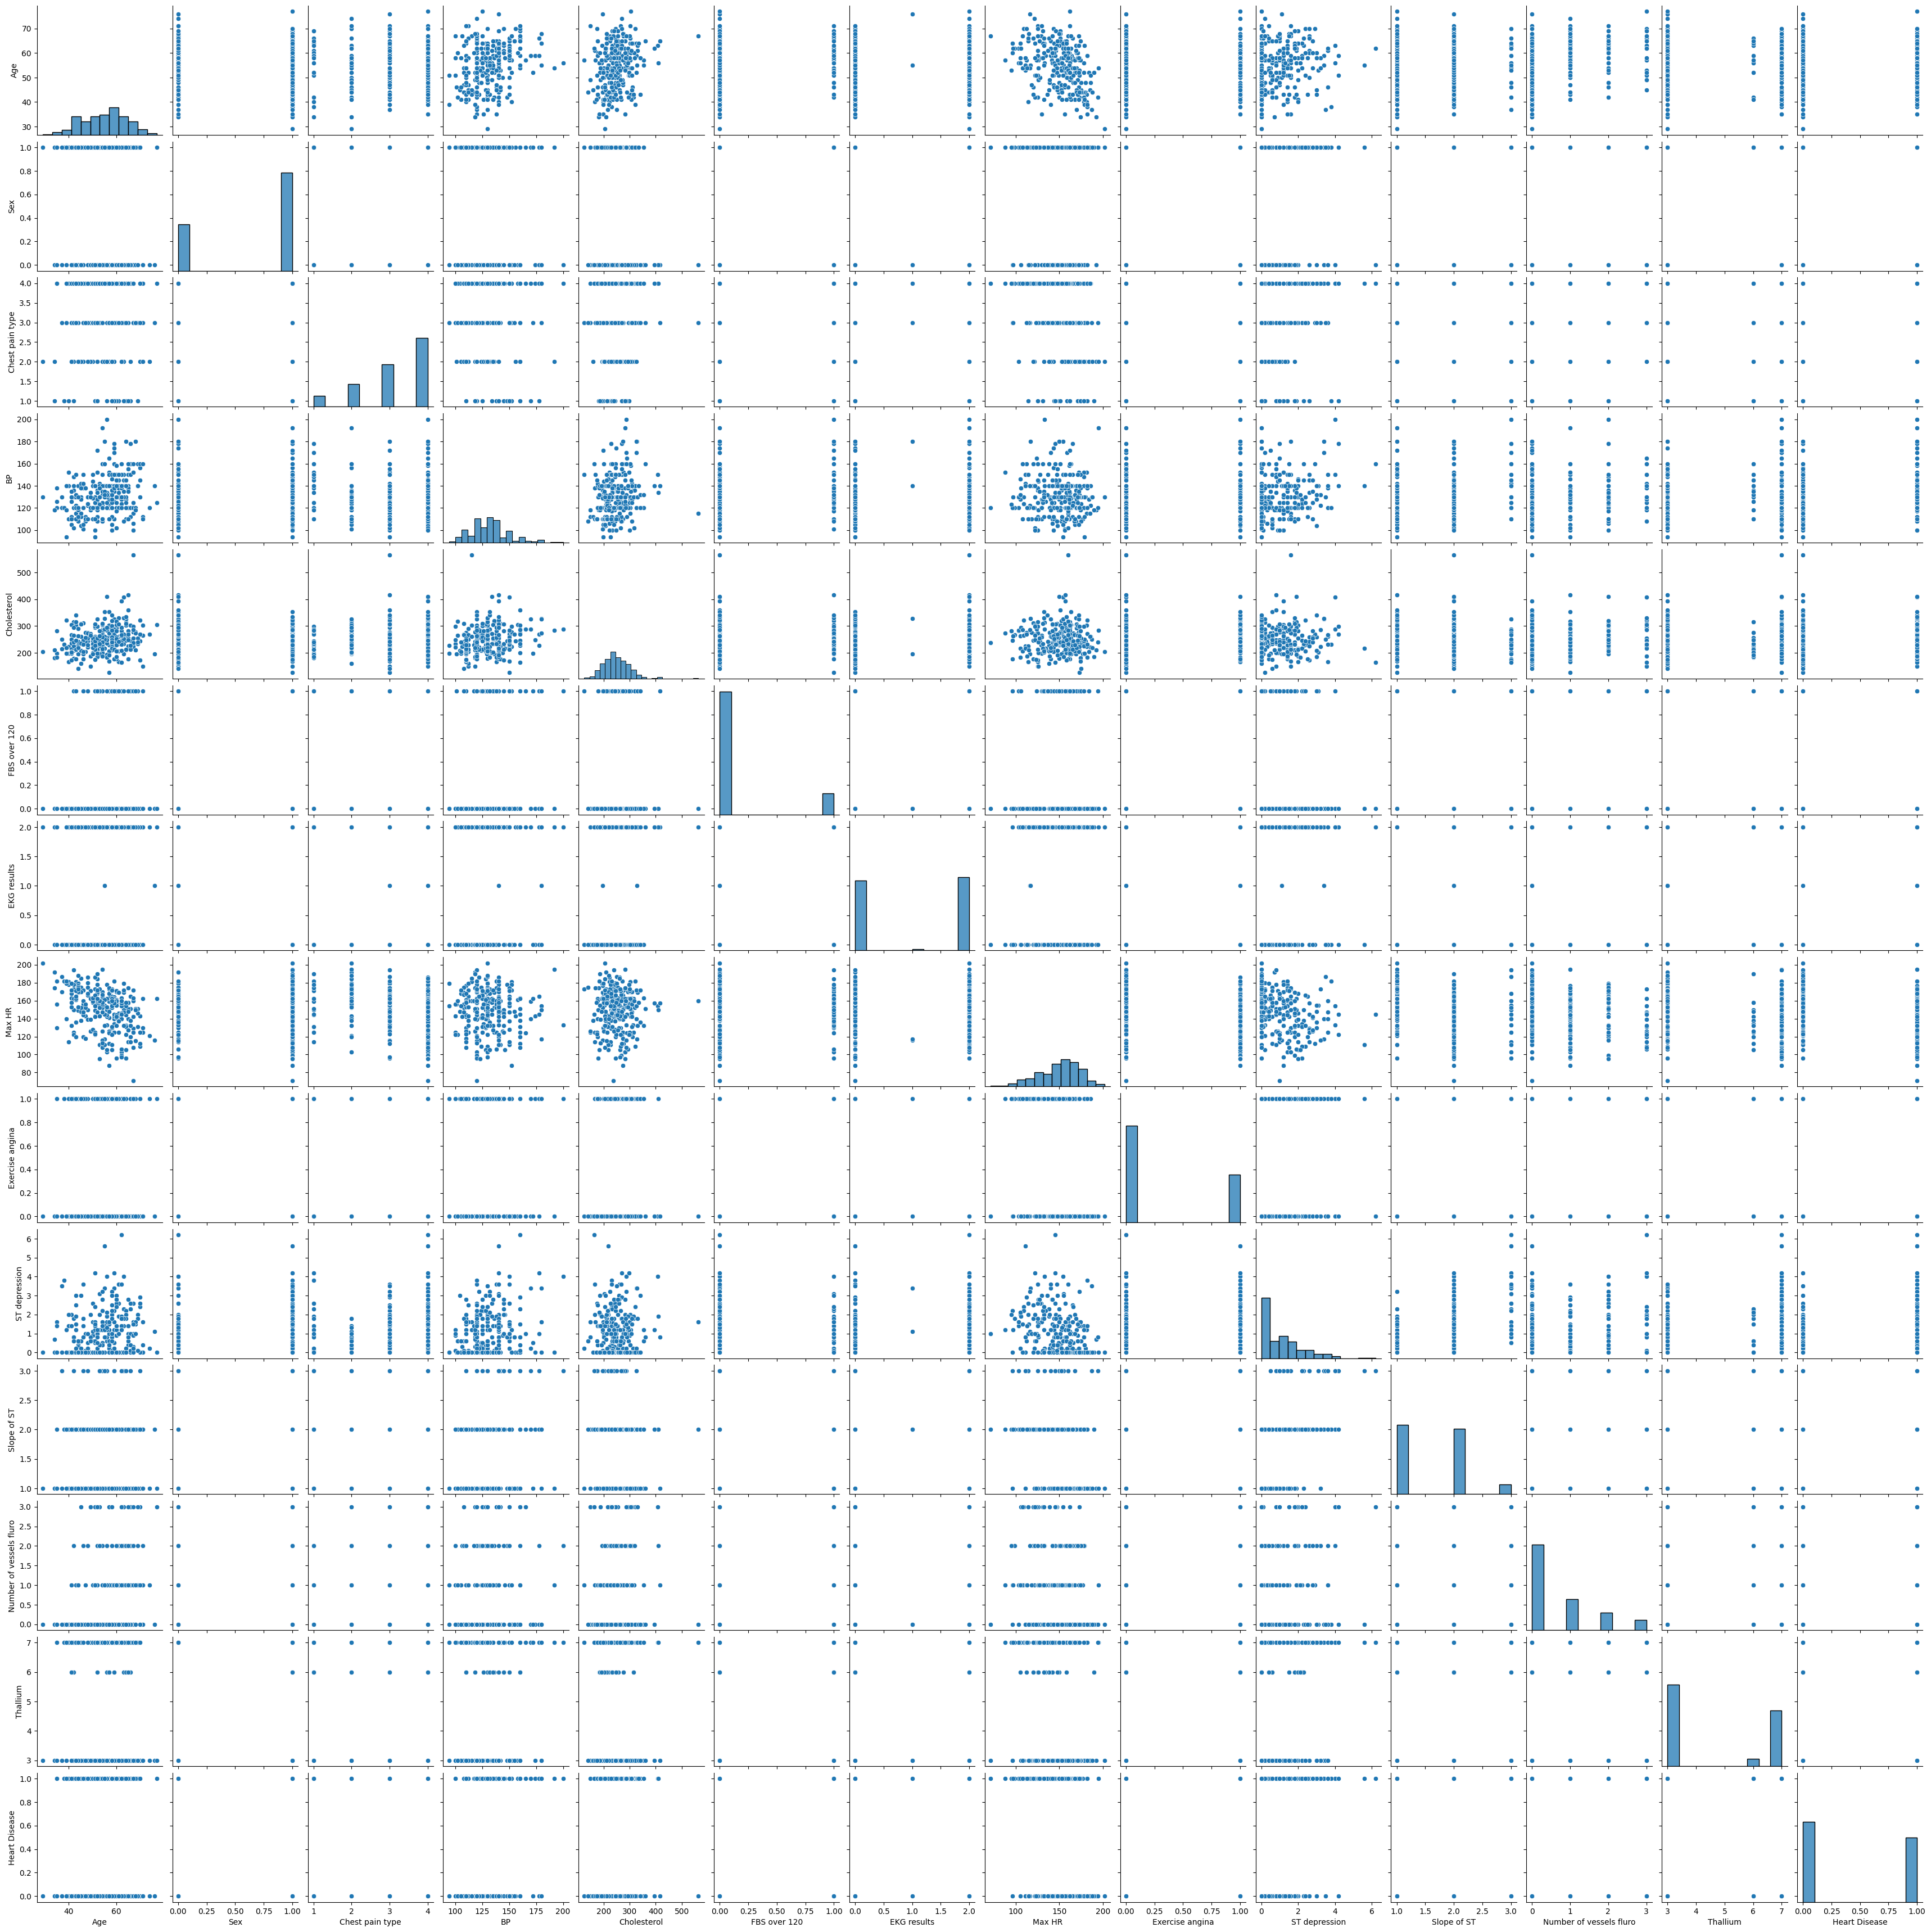

In [5]:
sns.pairplot(df)
plt.show()

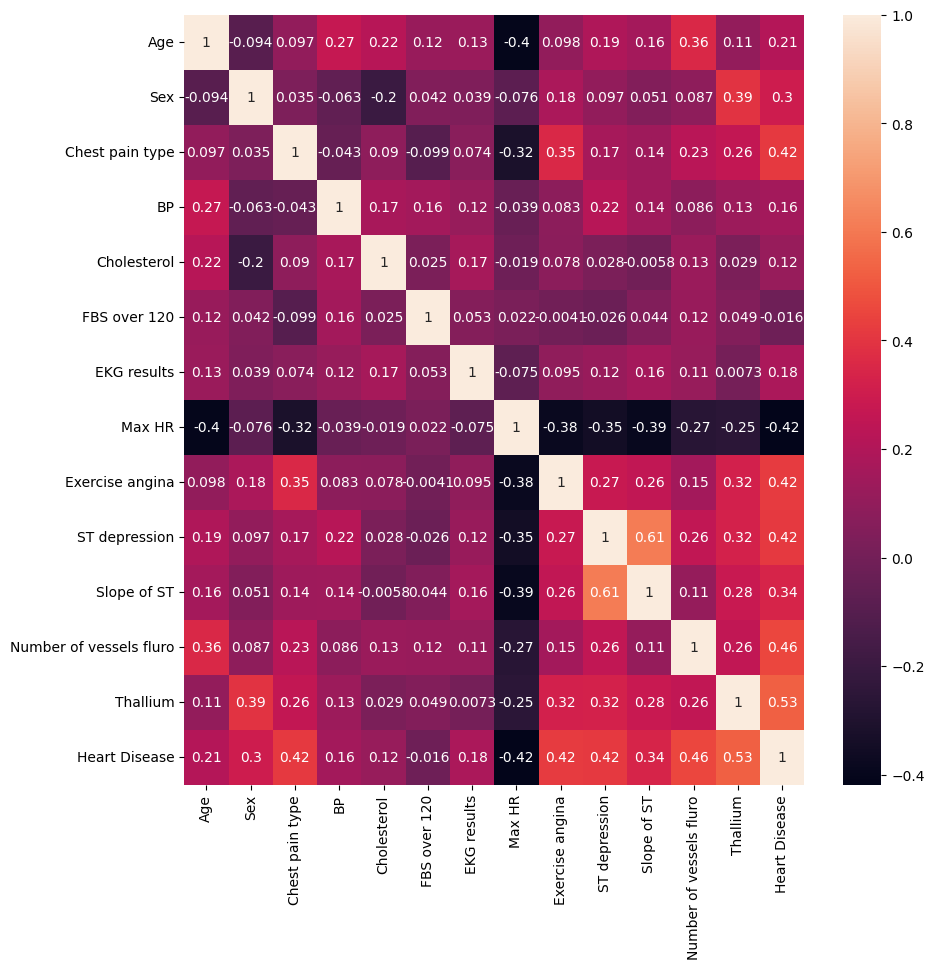

In [7]:
fig , ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [8]:
df.drop(["Max HR"],axis=1,inplace=True)

#### Split Data
- split data to features and target 
- use min max scaler to scale features 
    - because there are columns like BP and Cholesterol that have much larger values  
- split to training and testing data using train_test_split

In [9]:
Features=df.iloc[:,:-1]
Target=df.iloc[:,-1]
print(f"Features : {Features.columns}")

Features : Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Exercise angina', 'ST depression', 'Slope of ST',
       'Number of vessels fluro', 'Thallium'],
      dtype='object')


In [10]:
scaler=MinMaxScaler()
Features=scaler.fit_transform(Features)

In [11]:
Features_train,Features_test,Target_train,Target_test=train_test_split(Features,Target,random_state=90,train_size=0.8)

## Make a model
- Use Decission tree classifier as model
- Visualize Decision tree 
- Check model's accuracy

**To avoid overfitting and unwanted branches, I set values for min_impurity_decrease (Information Gain) & max_depth**

In [12]:
model=tree.DecisionTreeClassifier(min_impurity_decrease=0.009,max_depth=4)
model.fit(Features_train,Target_train)

DecisionTreeClassifier(max_depth=4, min_impurity_decrease=0.009)

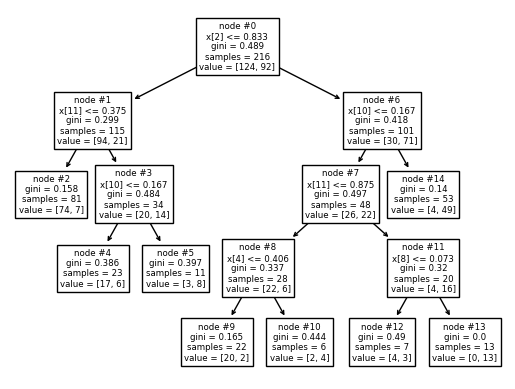

In [13]:
tree.plot_tree(model,node_ids=True)
plt.show()

In [14]:
print(f"Accuracy of training= {model.score(Features_train,Target_train)*100:.2f}")
print(f"Accuracy of testing= {model.score(Features_test,Target_test)*100:.2f}")

Accuracy of training= 87.50
Accuracy of testing= 85.19


**Trying to predict the result of the raw 10 (index = 9) and compare the resault with the target** 

In [15]:
prediction=model.predict(df.iloc[9:10,:-1])
target=df.iloc[9,-1]
print(f"Model prediction = {int(prediction)} \nTarget = {target}")

Model prediction = 1 
Target = 1


p:\PYTHON\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [16]:
import pickle
with open('heartmodel.pickle','wb') as fp:
    pickle.dump(model,fp)

In [17]:
with open('heartscaler.pickle','wb') as fp:
    pickle.dump(scaler,fp)

In [20]:
from sklearn.metrics import classification_report,accuracy_score
y_pred = model.predict(Features_test)
print(classification_report(Target_test,y_pred))
accuracy_score(Target_test,y_pred)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        26
           1       0.86      0.86      0.86        28

    accuracy                           0.85        54
   macro avg       0.85      0.85      0.85        54
weighted avg       0.85      0.85      0.85        54



0.8518518518518519